# REST API

The goal of this part of the assigment is to fetch data from the Nobel Prize REST API.

Fetch data in JSON format with information on the Nobel prizes in physics from the Nobel Prize API (v2). The docs can be found here.

API stands for application programmig interface and its a set of rules that helps us interact between different software
applications. The data **Nobel prizes** are stored on a server and api provides a way to intereact with that data. We will get 
that data over the internet. The way ot works is that we will make a request to datas endpoint (URL) and , the server will later process our request and provide us with relevant information. This way we can work with the data without locally having a copy on our pc.

In [10]:
import requests
import json


In [2]:
end_point = "http://api.nobelprize.org/2.0/nobelPrizes?yearTo=2023&nobelPrizeCategory=phy&format=json" 
response = requests.get(end_point)
data = response.json()

In [12]:
data

{'nobelPrizes': [{'awardYear': '1901',
   'category': {'en': 'Physics', 'no': 'Fysikk', 'se': 'Fysik'},
   'categoryFullName': {'en': 'The Nobel Prize in Physics',
    'no': 'Nobelprisen i fysikk',
    'se': 'Nobelpriset i fysik'},
   'dateAwarded': '1901-11-12',
   'prizeAmount': 150782,
   'prizeAmountAdjusted': 9704878,
   'links': {'rel': 'nobelPrize',
    'href': 'https://api.nobelprize.org/2/nobelPrize/phy/1901',
    'action': 'Get',
    'types': 'application/json'},
   'laureates': [{'id': '1',
     'knownName': {'en': 'Wilhelm Conrad Röntgen'},
     'fullName': {'en': 'Wilhelm Conrad Röntgen'},
     'portion': '1',
     'sortOrder': '1',
     'motivation': {'en': 'in recognition of the extraordinary services he has rendered by the discovery of the remarkable rays subsequently named after him',
      'se': 'såsom ett erkännande av den utomordentliga förtjänst han inlagt genom upptäckten av de egendomliga strålar, som sedermera uppkallats efter honom'},
     'links': {'rel': 'lau

#### Using the retrieved data, extract all the prize motivations from the JSON-list and visualise the frequencies using a word cloud. 

The algoritm (briefly) is following: 
First we will create an empty string where we will append all the words from the different motivation keys. We will also create a set of **stopwords** with the imported library. The stopwords are words that have very little meaning for our analysis and hence words that we wish to ignore. Words like "the" "an" "and" are included in that list.

We will then create a loop that iterates the data. From the data we will get **nobelPrizes** and from there we will get **laureates** and from there to **motivation** key. In that way we will "snatch" all motivations strings. 

After that we will split our motivation string into individual words and make every word with a lower case.
Since we got different languages in the data we will also specify that we want to extract the english type of motivation string. after that these words will join the empty string that we initially created. 

When this is done we will generate a **Word cloud** which is a package. The word cloud have different paramters like size, background color etc. We can adjust them pretty much however we like. One of the important parameteres is **stop words** so that we can exclude unnessecary words.

We will then visualize (plot) the frequency of the data. The size of the words in the image corresponds to the frequency of that word in the data.

In [4]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd

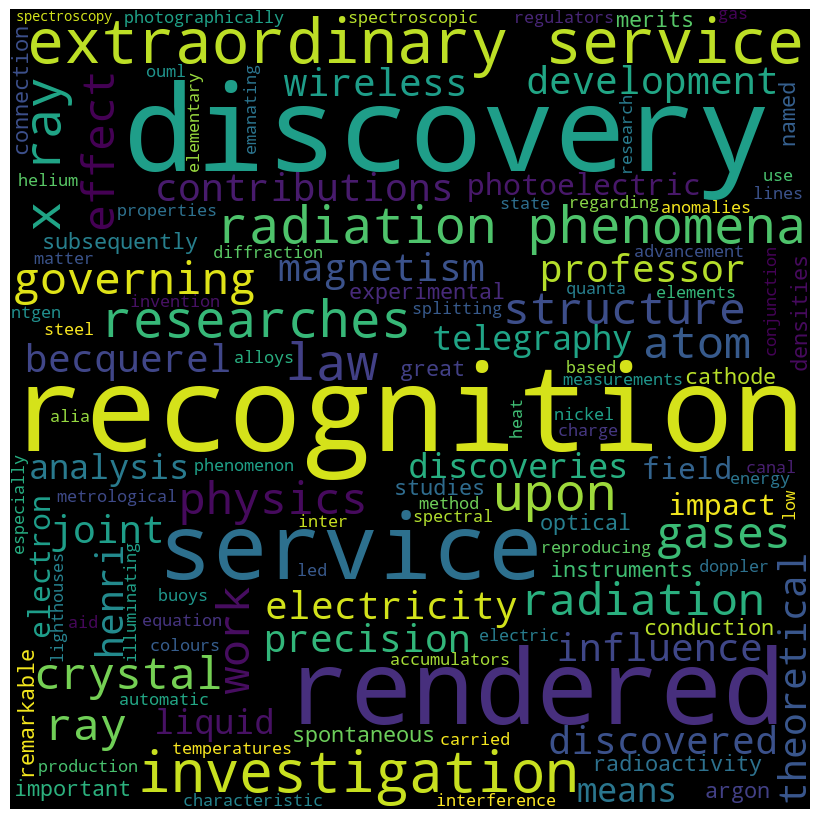

In [5]:
comment_words = ''  #creating an empty string
stopwords = set(STOPWORDS) #define stop words - prebuild

for prize in data.get('nobelPrizes', []):  #creating a foor loop and iterationg for nobelPrizes
    laureates = prize.get('laureates', []) # contonue iterationg for laureates

    # Iterate through the laureates
    for laureate in laureates:
        motivation_dict = laureate.get('motivation', {})  # get the motivation string

        motivation = motivation_dict.get('en', '') # getting the "eng version" of the motivation string

        
        tokens = motivation.split() #split into words (tokens)

        for i in range(len(tokens)):
            tokens[i] = tokens[i].lower()  # convert all tokens to lowercase

        comment_words += " ".join(tokens) + " "  #appends words to the empty string that we created

wordcloud = WordCloud(width=800, height=800,  #creating a wordcloud with all the parameters
background_color='black',
stopwords=stopwords,
min_font_size=10).generate(comment_words)

plt.figure(figsize=(8, 8), facecolor=None) # plotting
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()

# Web Scraping


The goal of this part of the assignment is to scrape data from https://books.toscrape.com/.
Create a web scraper that generates the following table. You can find more information on each book on its own webpage.

In many cases the data that we eventually wish to work with are not always in the API format. To come aroud that we can use **web scraping**. Web scraping involves methods for retrviing data from websites. We will use **BeatifulSoup** library which is 
a HTML parsing library.

Now we have to tell to BeatifulSoup what to scrape. For that we will inspect the HTML of the webpage.
For instance from the webpage in this task we can see that each book lies inside of **< article >** tag. And this tag has class atributes **product_pod**. 

So what we will do first is that we are going to look for the elements "article" that has class "product_pod".
We will then iterate over each such element and extract our data. We wish to extract the title, price and rating
adn then append **all_data** with the relevant data (3 elemets for each iteration) When we have done that we wish to represent it as a dataframe.s

Note that all this needs be done for the first 3 pages of our website. We will therefore iterate once again for pages 1-3.

In [6]:
import pandas as pd
import requests 
from bs4 import BeautifulSoup 

In [7]:
url_books = "https://books.toscrape.com/" #url for the website

all_data = []  # we will store the data here

for page_number in range(1, 4): #loop for page 1-3
    page_url = url_books.format(page_number) #construct url for page 1,2,3
    r = requests.get(page_url) #store the get request in variable r
    soup = BeautifulSoup(r.content, 'html.parser') # creates a "soup" object
    book_containers = soup.find_all('article', class_='product_pod') # find element article with class product_pod

    for book in book_containers:  #loop for iterating for each article (book)
        title = book.h3.a['title'] #getting title
        price = book.select_one('div p.price_color').get_text() #getting price
        rating = book.select_one('p.star-rating')['class'][1] # getting raing
        all_data.append((title, price, rating)) # appends data with triplet (title, price , rating)

df = pd.DataFrame(all_data, columns=['Title', 'Price', 'Rating']) #creating a dataframe with correct columns

df

,Title,Price,Rating
0,A Light in the Attic,£51.77,Three
1,Tipping the Velvet,£53.74,One
2,Soumission,£50.10,One
3,Sharp Objects,£47.82,Four
4,Sapiens: A Brief History of Humankind,£54.23,Five
5,The Requiem Red,£22.65,One
6,The Dirty Little Secrets of Getting Your Dream...,£33.34,Four
7,The Coming Woman: A Novel Based on the Life of...,£17.93,Three
8,The Boys in the Boat: Nine Americans and Their...,£22.60,Four
9,The Black Maria,£52.15,One


In [8]:
!jupyter nbconvert --to markdown hw6.ipynb

[NbConvertApp] Converting notebook hw6.ipynb to markdown
[NbConvertApp] Support files will be in hw6_files\
[NbConvertApp] Making directory hw6_files
[NbConvertApp] Writing 46596 bytes to hw6.md
